# Geometric representation

**In this example, we compare the profile likelihood paths to the cost contour of the model and show that the paths follows the direction of the canyon.
We will also give some interpretation of the results.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from profile_likelihood import profile_likelihood

%matplotlib inline

## Define the model

The model is defined as the sum of trigonometric functions, in the form of
$$ f\left(t; \vec{\theta}\right) = \sin(\theta_0 t) + \cos(\theta_1 t), $$
where we sample at 3 time points $t = [1.0, 1.2, 2.0]^T$.
The default parameters are chosen to be $\vec{\theta} = [1.0, 2.5]^T$.
The data is set to be the predictions of the model at the default parameters and the standard deviation is chosen to be 30% of the data.
The implementation of this model is given in `model_trigonometric.py`.

In [2]:
import model_trigonometric as model
import manifold

best_fit = model.best_fit
param_names = model.param_names
nparams = model.nparams
npred = model.npred

The cost contour of this model is shown below.

In [3]:
# Get cost contour data
Theta0, Theta1, Cost = manifold.cost_contour_data(
    model.cost,
    xlist=np.linspace(-5, 5, 100),
    ylist=np.linspace(-5, 5, 100),
)

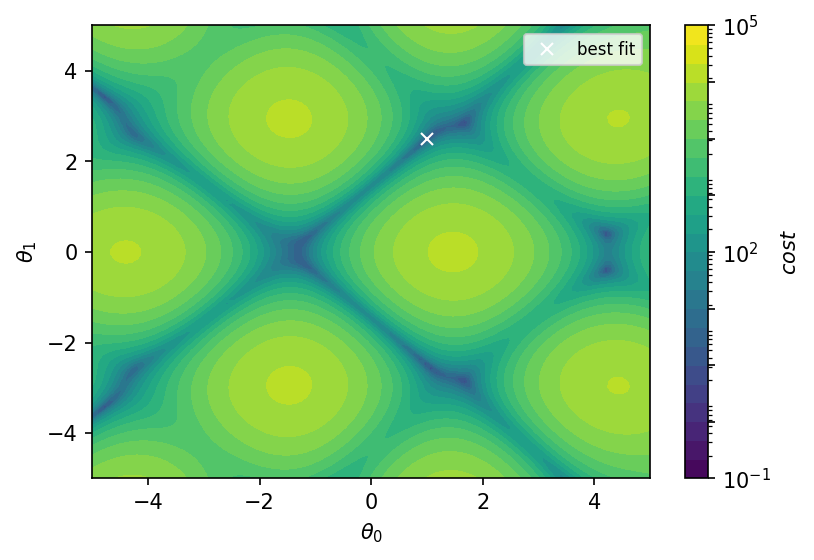

In [4]:
ax, clb = manifold.plot_cost_contour(Theta0, Theta1, Cost, levels=25, scale="log")
ax.plot(best_fit[0], best_fit[1], "wx", label="best fit")
ax.set_xlabel(param_names[0])
ax.set_ylabel(param_names[1])
clb.set_label(r"$cost$")
plt.legend(fontsize=8)
plt.show()
plt.close()

## Profile likelihood computation

After the model is defined, then we create a `profile_likelihood` object.

In [5]:
# Define the likelihood object
likelihood = profile_likelihood(model.residuals, nparams, npred)

The computation is done by calling the `compute` method.
By specifying the boundaries of the parameters and the spacing between points, linearly spaced points are created as the fixed parameter values.
The results of the computation are stored as a dictionary.

In [6]:
bounds = [-10, 10]
dt = 0.1

# Calculate profile likelihood
results = likelihood.compute(best_fit, bounds=bounds, dt=dt)
ldata0 = likelihood.results["parameter0"]
ldata1 = likelihood.results["parameter1"]

# # Print the results
# print(likelihood.results)

## Plot the results

We will now compare the profile likelihood paths to the cost contour of the model.

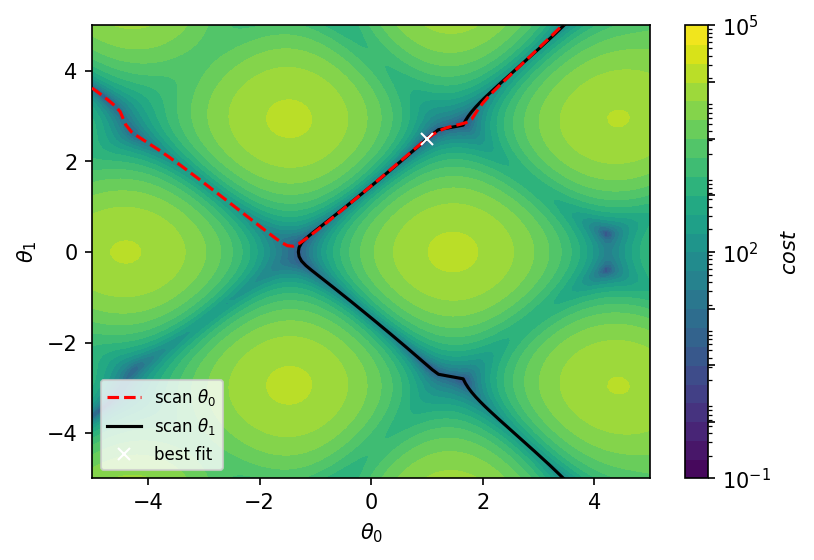

In [7]:
# Plot the profile likelihood paths on top of the cost contour
ax, clb = manifold.plot_cost_contour(Theta0, Theta1, Cost, levels=25, scale="log")
ax.plot(
    ldata0["parameters"][:, 0],
    ldata0["parameters"][:, 1],
    "r--",
    label=f"scan {param_names[0]}",
    zorder=10,
)
ax.plot(
    ldata1["parameters"][:, 0],
    ldata1["parameters"][:, 1],
    "k-",
    label=f"scan {param_names[1]}",
)
ax.plot(best_fit[0], best_fit[1], "wx", label="best fit", zorder=20)
ax.set_xlim((-5, 5))
ax.set_ylim((-5, 5))
ax.set_xlabel(param_names[0])
ax.set_ylabel(param_names[1])
clb.set_label(r"$cost$")
plt.legend(fontsize=8)
plt.show()
plt.close()

As seen above, the profile likelihood paths follow the canyon in the parameter space.
Using this behavior, we can deduce the location of the canyon when the cost cost contour is not available for some models.

## Plot the cost

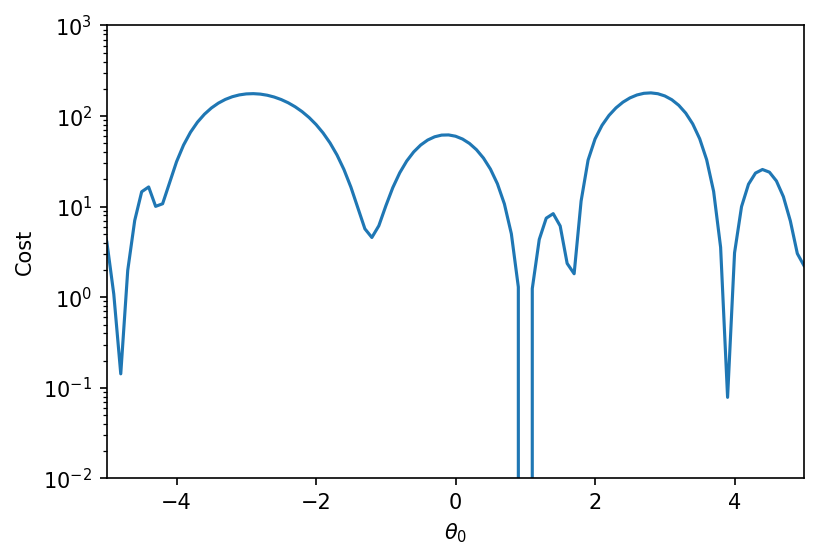

In [8]:
# Plot the cost along theta_0 direction
plt.figure(dpi=150, facecolor="w")
plt.plot(ldata0["parameters"][:, 0], ldata0["cost"])
plt.xlim(-5, 5)
plt.yscale("log")
plt.ylim(1e-2, 1e3)
plt.xlabel(param_names[0])
plt.ylabel("Cost")
plt.show()
plt.close()

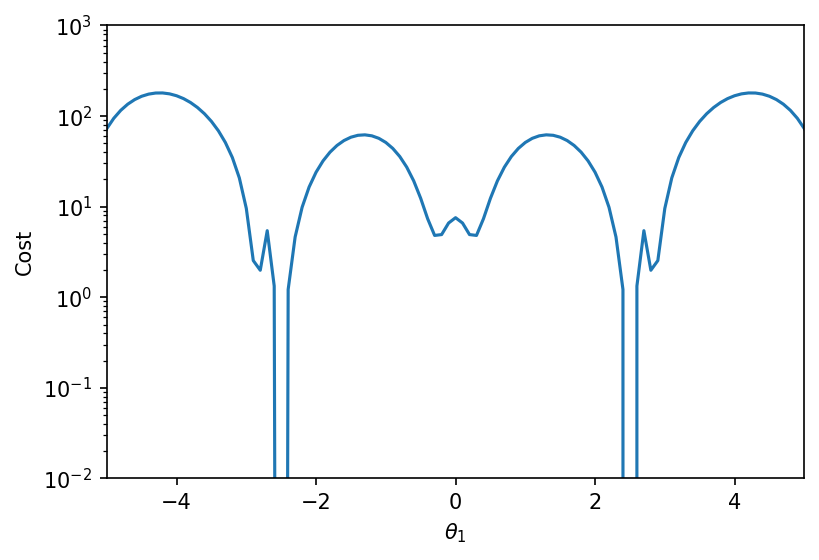

In [9]:
# Plot the cost along theta_1 direction
plt.figure(dpi=150, facecolor="w")
plt.plot(ldata1["parameters"][:, 1], ldata1["cost"])
plt.xlim(-5, 5)
plt.yscale("log")
plt.ylim(1e-2, 1e3)
plt.ylabel("Cost")
plt.xlabel(param_names[1])
plt.show()
plt.close()

The plots of the cost along the paths (the negative profile log-likelihood) show the profiles of the canyon.